In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**LOADING AND EDA OF THE DATASET**

In [37]:
# Load the Iris dataset
iris = load_iris()

In [38]:
# Create a DataFrame for the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [39]:
# Add the target variable (species) correctly
df['species'] = iris.target

In [40]:
# Rename target values for better readability
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [41]:
# Apply scaling to the features
scaler = StandardScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

In [42]:
# Check the first few rows again
print("Dataset Head:")
print(df.head())

Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [43]:
#checking for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


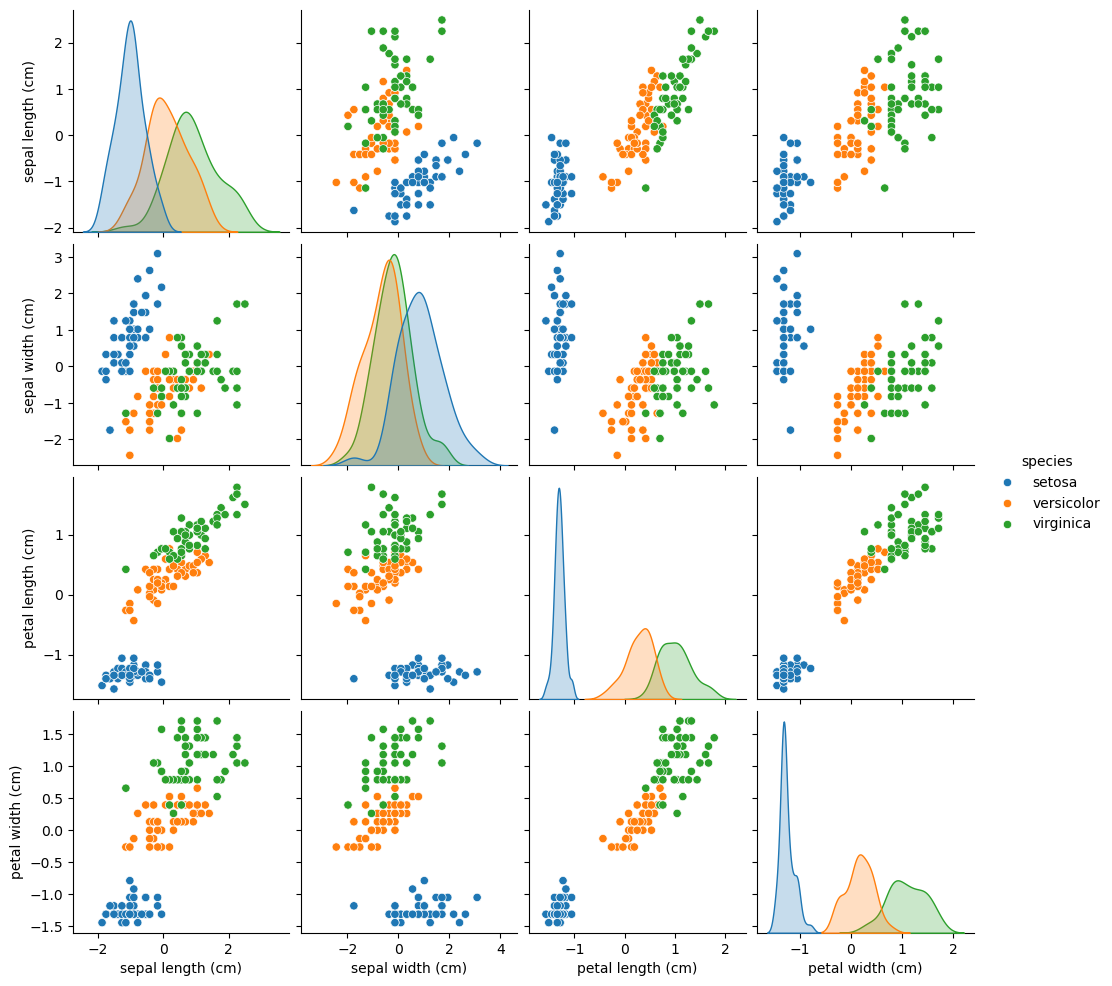

In [44]:
#pairplot to visualize pairwise relationships
pairplot = sns.pairplot(df, hue='species', diag_kind='kde')
plt.savefig('pairplot_debug.png')  # Save the plot to a file to check
plt.show()

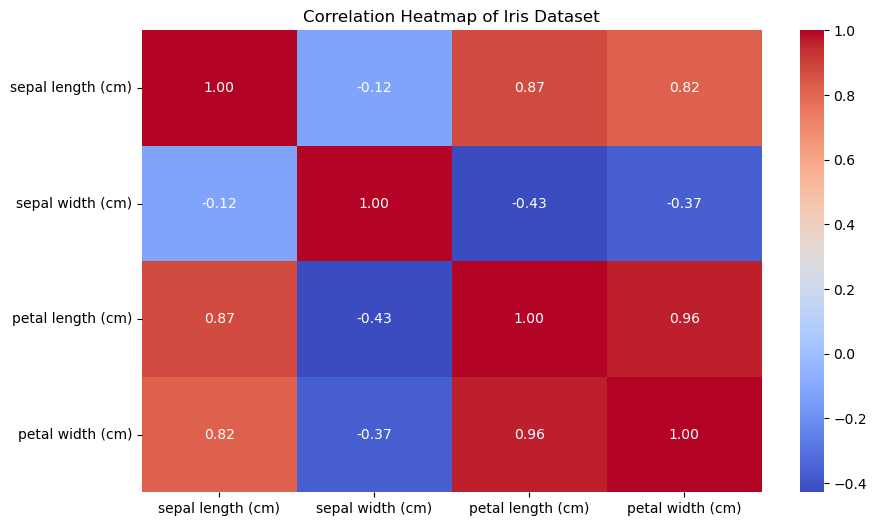

In [55]:
#correlation heatmap to see relationships between numeric features
plt.figure(figsize=(10, 6))
numeric_features = df.drop('species', axis=1)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

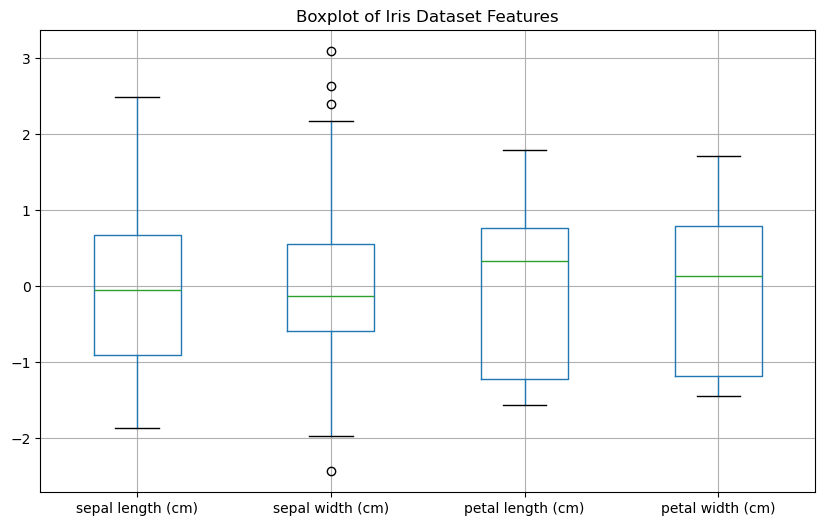

In [21]:
#boxplots to visualize distribution and outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Iris Dataset Features')
plt.show()

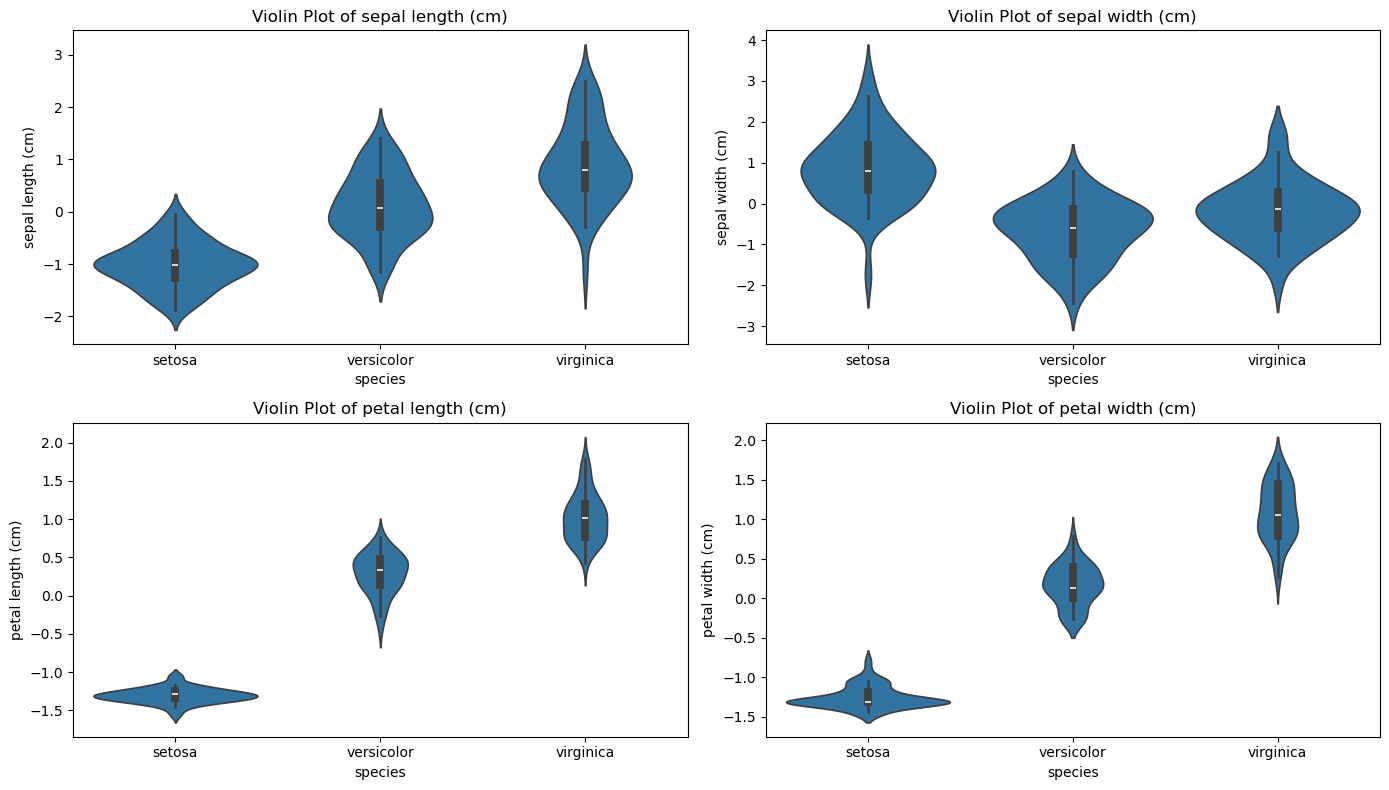

In [46]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(df.columns[:-1]):  # excluding 'species' column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.savefig('violinplot_debug.png')  # Save the plot to a file to check
plt.show()

In [48]:
# save cleaned data to csv 
df.to_csv('cleaned_iris_data.csv', index=False)
print("Data cleaning complete. Saved to 'cleaned_iris_data.csv'")

Data cleaning complete. Saved to 'cleaned_iris_data.csv'


In [49]:
!jupyter nbconvert --to script data_cleaning.ipynb

[NbConvertApp] Converting notebook data_cleaning.ipynb to script
[NbConvertApp] Writing 2315 bytes to data_cleaning.py
